In [1]:
setwd('/import/DB/workdir/cd40/')

In [2]:
outdaa = readRDS('/import/DB//workdir/cd40/outdata/outdata.d3.d7.rds')

In [3]:
my = readRDS('ko3d.wt3d.cd40.rds')

In [4]:
table(my$orig.ident)


KO3d WT3d 
6816 6149 

In [5]:
table(outdaa$orig.ident)


  d3   d7 
5297 2226 

In [16]:
single.ob=merge(outdaa,my)
immune.combined = single.ob

In [ ]:
# DefaultAssay(immune.combined) = 'RNA'

# library(Seurat)

# # ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")
# # testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
# # testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
# # DefaultAssay(testAB.integrated) <- "integrated"
# # # Run the standard workflow for visualization and clustering
# # testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
# # testAB.integrated <- RunPCA(testAB.integrated, npcs = 30, verbose = FALSE)
# # testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:20)
# # testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.3)
# # testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:20)
# # testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:20)
# # immune.combined = testAB.integrated

# DimPlot(immune.combined, reduction = "umap",label =T)

# DefaultAssay(immune.combined) = 'RNA'

### harmony

In [22]:
library(dplyr)
library(harmony)

Loading required package: Rcpp

Warning message:
"package 'Rcpp' was built under R version 4.2.3"


In [18]:
scRNA_harmony = immune.combined
DefaultAssay(scRNA_harmony) = 'RNA'

In [23]:
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony converged after 6 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
 17.387   5.450  15.127 

In [25]:
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)

13:59:56 UMAP embedding parameters a = 0.9922 b = 1.112

13:59:56 Read 20488 rows and found 20 numeric columns

13:59:56 Using Annoy for neighbor search, n_neighbors = 30

13:59:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

13:59:58 Writing NN index file to temp file /tmp/RtmpXtCjo9/file348626c457890

13:59:58 Searching Annoy index using 1 thread, search_k = 3000

14:00:04 Annoy recall = 100%

14:00:05 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:00:06 Initializing from normalized Laplacian + noise (using irlba)

14:00:07 Commencing optimization for 200 epochs, with 906812 positive edges

14:00:28 Optimization finished



In [26]:
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.3)
##作图
#group_by_cluster
plot1 = DimPlot(scRNA_harmony, reduction = "umap", label=T) 

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 20488
Number of edges: 681422

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9208
Number of communities: 11
Elapsed time: 8 seconds


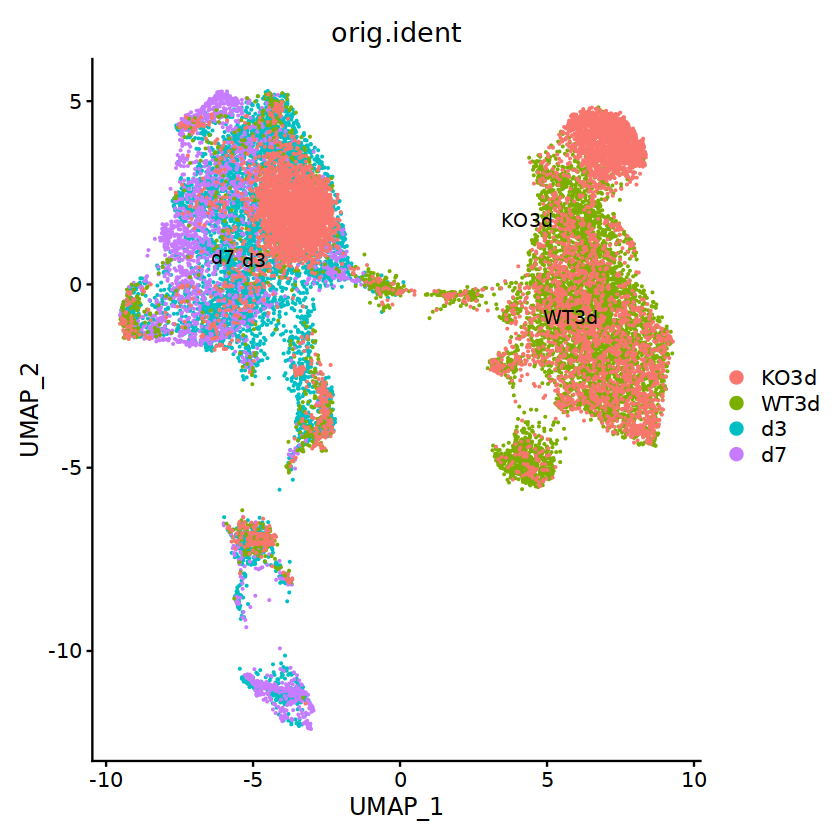

In [33]:
DimPlot(scRNA_harmony, reduction = "umap", label=T,group.by = 'orig.ident') 

In [29]:
DefaultAssay(scRNA_harmony) = 'RNA'  

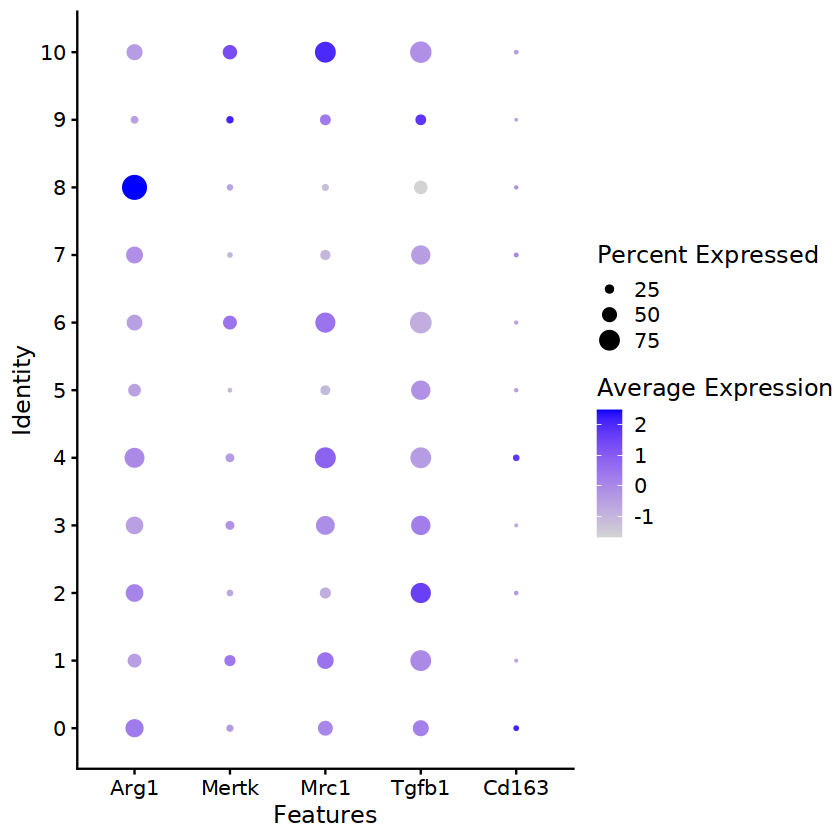

In [31]:
DotPlot(scRNA_harmony,features = c('Arg1','Mertk','Mrc1','Tgfb1','Cd163')) 

In [35]:
c0.marker = read.csv('./outdata/c0.marker.csv')

In [76]:
feature = list(c0.marker$gene)

In [78]:
sce = readRDS('./merge.8.9.to.0.rds')

In [79]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7 
4190 4890 2095  518  382  586   83  221 

In [80]:
DefaultAssay(sce) = 'RNA'

In [81]:
sce <- AddModuleScore(sce,
                          features = feature,
                          name = 'c0_related')

In [82]:
library(ggplot2)

In [83]:
Idents(sce) = 'seurat_clusters'

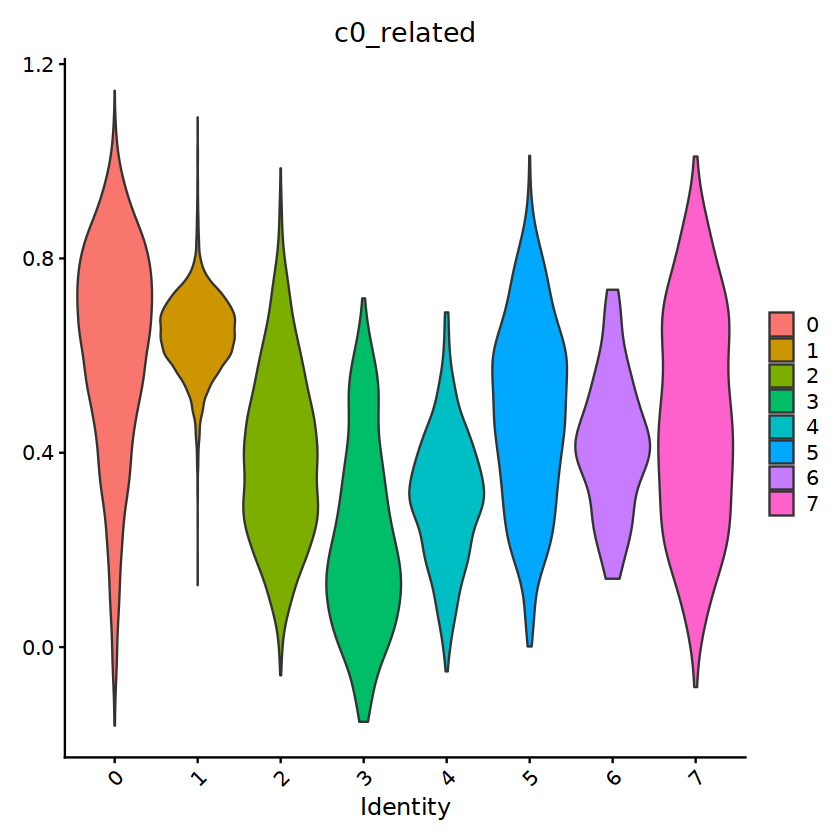

In [87]:
VlnPlot(sce,features = 'c0_related1',pt.size = 0)+ggtitle('c0_related')

In [88]:
ggsave('res.c0.score.pdf',width = 8,height = 6)

In [85]:
library(ggpubr)

### https://cloud.tencent.com/developer/article/2317475


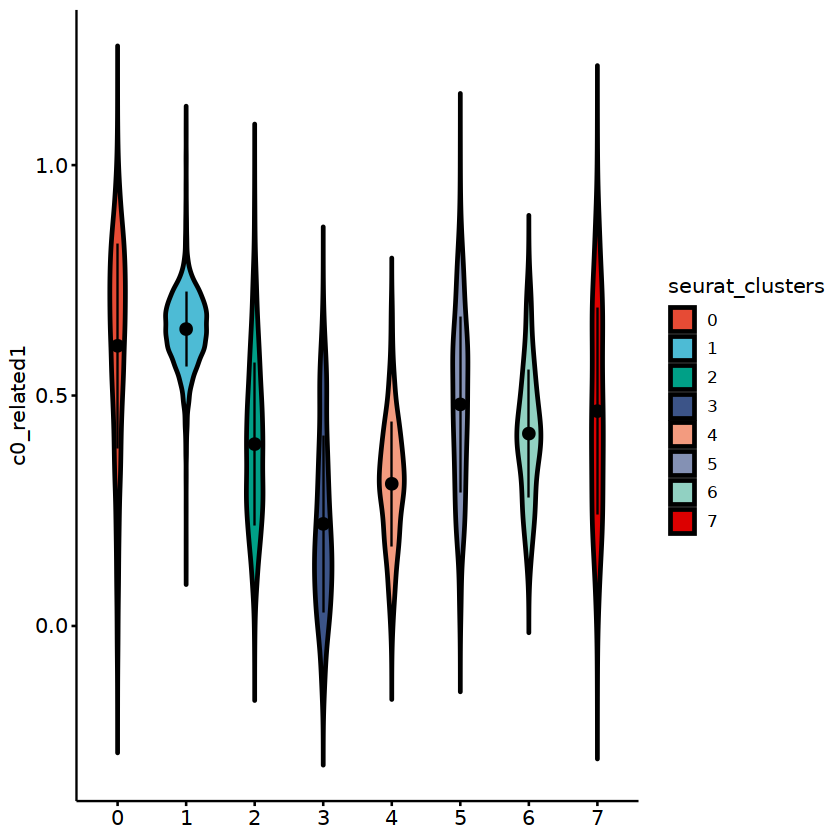

In [86]:
# ggviolin(sce@meta.data, x="seurat_clusters", y="c0_related1", width = 0.6, 
#           color = "black",#轮廓颜色
#           fill="seurat_clusters",#填充
#           palette = "npg",
#          add = 'mean_sd',
#           xlab = F, #不显示x轴的标签
#           bxp.errorbar=T,#显示误差条
#           bxp.errorbar.width=0.5, #误差条大小
#           size=1, #箱型图边线的粗细
#           outlier.shape=NA, #不显示outlier
#           legend = "right")
